# Time series values for Rjúpnasalir pumpstation

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df_pressure = pd.read_excel("data/H-KOP-RS-ÞS212.xlsx")
df_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure.head()



,start_time,value
0,2022-03-13 09:00:00,7.8
1,2022-03-14 23:00:00,7.8
2,2022-03-13 16:00:00,7.8
3,2022-03-08 02:00:00,7.8
4,2022-03-08 03:00:00,7.8


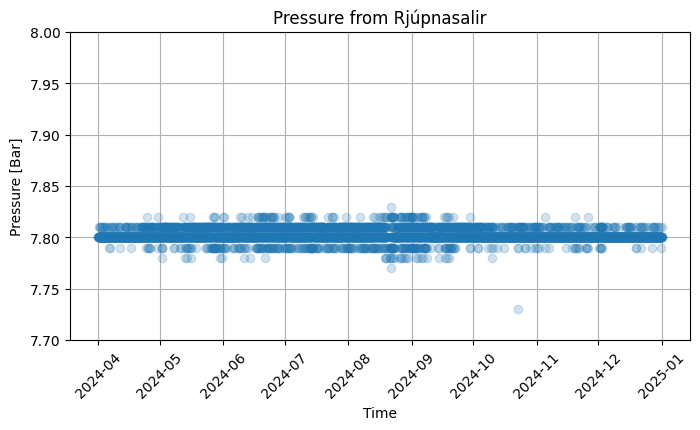

In [15]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for July 2024
df_filtered = df_pressure[(df_pressure['start_time'].dt.year == 2024) & (df_pressure['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered['start_time'], df_filtered['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([7.7, 8])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [16]:
df_flow = pd.read_excel("data/H-KOP-RS-RS212.xlsx")
df_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow.head()

,start_time,value
0,2022-03-13 09:00:00,68.39
1,2022-03-14 23:00:00,64.47
2,2022-03-13 16:00:00,64.36
3,2022-03-08 02:00:00,63.76
4,2022-03-08 03:00:00,62.39


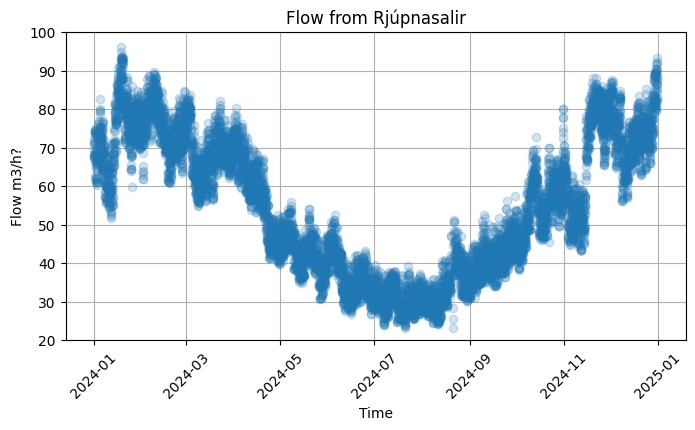

In [ ]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for July 2024
df_filtered_flow = df_flow[(df_flow['start_time'].dt.year == 2024)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered_flow['start_time'], df_filtered_flow['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('LPS')
plt.title('Flow from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([20, 100])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [ ]:
average_flow = df_filtered_flow['value'].mean()

# Print the average
print(f"The average flow is: {average_flow:.2f} LPS")

The average flow is: 54.29 m3/h


## Prentum specific dag

In [25]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-03"
df_specific_day = df_flow[df_flow['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
23980 2024-11-03 04:00:00  55.86
23981 2024-11-03 02:00:00  56.55
23982 2024-11-03 07:00:00  55.98
23983 2024-11-03 06:00:00  55.08
23984 2024-11-03 05:00:00  55.47
23985 2024-11-03 01:00:00  57.07
24005 2024-11-03 22:00:00  51.82
24013 2024-11-03 21:00:00  54.18
24014 2024-11-03 23:00:00  49.35
24015 2024-11-03 20:00:00  56.41
24049 2024-11-03 03:00:00  55.77
24095 2024-11-03 19:00:00  58.44
24096 2024-11-03 18:00:00  58.48
24097 2024-11-03 17:00:00  56.93
24098 2024-11-03 16:00:00  55.92
24099 2024-11-03 11:00:00  59.36
24100 2024-11-03 08:00:00  56.13
24101 2024-11-03 10:00:00  59.15
24102 2024-11-03 09:00:00  57.63
24111 2024-11-03 15:00:00  55.24
24112 2024-11-03 14:00:00  56.57
24113 2024-11-03 12:00:00  58.96
24114 2024-11-03 13:00:00  57.73


In [26]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-03 01:00:00,57.07,1.014319
2024-11-03 02:00:00,56.55,1.005077
2024-11-03 03:00:00,55.77,0.991214
2024-11-03 04:00:00,55.86,0.992813
2024-11-03 05:00:00,55.47,0.985882
2024-11-03 06:00:00,55.08,0.978950
2024-11-03 07:00:00,55.98,0.994946
2024-11-03 08:00:00,56.13,0.997612
2024-11-03 09:00:00,57.63,1.024272


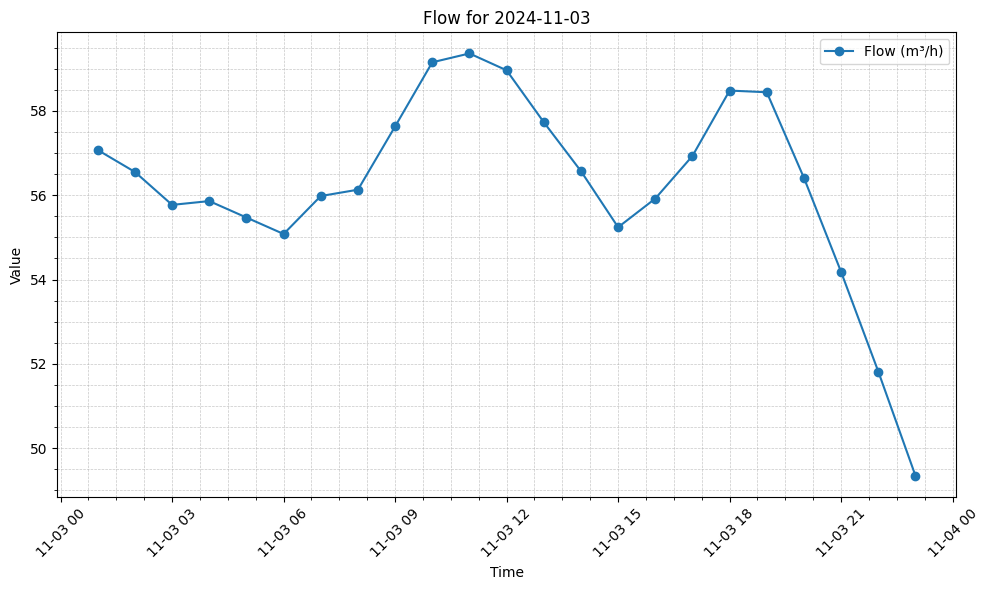

In [28]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m³/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Flow for {specific_day}')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

df_specific_day[['value']].to_csv('flow_values_specific_day.csv', index=True)


In [22]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')


df_specific_day = df_pressure[df_pressure['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
23981 2024-11-03 04:00:00   7.80
23982 2024-11-03 02:00:00   7.80
23983 2024-11-03 07:00:00   7.80
23984 2024-11-03 06:00:00   7.80
23985 2024-11-03 05:00:00   7.80
23986 2024-11-03 01:00:00   7.81
24006 2024-11-03 22:00:00   7.80
24014 2024-11-03 21:00:00   7.80
24015 2024-11-03 23:00:00   7.80
24016 2024-11-03 20:00:00   7.80
24050 2024-11-03 03:00:00   7.80
24095 2024-11-03 19:00:00   7.80
24096 2024-11-03 18:00:00   7.80
24097 2024-11-03 17:00:00   7.80
24098 2024-11-03 16:00:00   7.80
24099 2024-11-03 11:00:00   7.80
24100 2024-11-03 08:00:00   7.80
24101 2024-11-03 10:00:00   7.80
24102 2024-11-03 09:00:00   7.80
24111 2024-11-03 15:00:00   7.80
24112 2024-11-03 14:00:00   7.80
24113 2024-11-03 12:00:00   7.80
24114 2024-11-03 13:00:00   7.80


In [23]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_press = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_press  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-03 01:00:00,7.81,1.001226
2024-11-03 02:00:00,7.80,0.999944
2024-11-03 03:00:00,7.80,0.999944
2024-11-03 04:00:00,7.80,0.999944
2024-11-03 05:00:00,7.80,0.999944
2024-11-03 06:00:00,7.80,0.999944
2024-11-03 07:00:00,7.80,0.999944
2024-11-03 08:00:00,7.80,0.999944
2024-11-03 09:00:00,7.80,0.999944


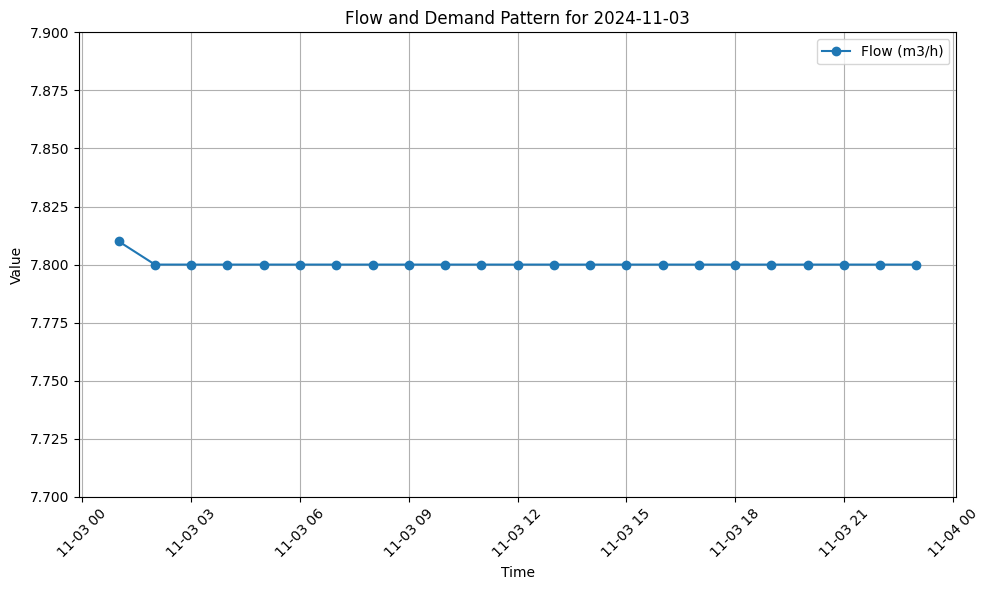

In [24]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow and Demand Pattern for 2024-11-03')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim([7.7 ,7.9])

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()